# Europe Fuel Prices

## Data

http://www.fuel-prices-europe.info/

In [1]:
FULL_DATA = 'data/europe-fuel-prices-final.csv'

## Global imports

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['cmb10', 'Adobe Caslon Pro', 'Palatino Linotype']

import seaborn as sns

from IPython.core.pylabtools import figsize

%matplotlib inline

In [3]:
%cd ..
from utils import colors, plot
%cd europe-fuel-prices

C:\Users\USER\Dropbox\Projectos\data-viz
C:\Users\USER\Dropbox\Projectos\data-viz\europe-fuel-prices


## Load data

In [4]:
import pandas as pd
import numpy as np


# Load from CSV
df = pd.read_csv(FULL_DATA, delimiter=';')

df.head(5)

,country,eu,europe,unleaded_95_eur,diesel_eur,lpg_eur,lpg_nozzle,lpg_stations,record_date,currency,unleaded_95_local_price,diesel_local_price,lpg_local_price
0,Albania,No,Yes,1.410540,1.385938,0.590459,Dish,70,"January 2, 2020",ALL,172.000,169.000,72.000
1,Algeria,No,No,0.169721,0.102884,0.067588,Unknown,Unknown,"January 2, 2020",DZD,22.600,13.700,9.000
2,Andorra,No,Yes,1.164000,1.054000,NaN,Unknown,1,"January 2, 2020",EUR,1.164,1.054,NaN
3,Armenia,No,Yes,0.954450,0.898305,NaN,Unknown,Unknown,"January 2, 2020",AMD,510.000,480.000,NaN
4,Austria,Yes,Yes,1.169000,1.155000,0.779000,Dish,26,"January 2, 2020",EUR,1.169,1.155,0.779


## Plot prices

In [5]:
# Set color based
def set_region(row):
    if row['eu'] == 'Yes':
        return 'EU'
    elif row['europe'] == 'Yes':
        return 'Europe'
    else:
        return 'Other'
    
df['region'] = df.apply(lambda row : set_region(row), axis=1)

In [6]:
# Plot barchart function
def plot_barchart(y, title):
    figsize(18,8)
    ax = sns.barplot(x='country', y=y, hue='region', data=df, palette=cp, dodge=False, saturation=1)

    # Style the plot
    plt.legend(loc='upper right', fontsize=16, frameon=False)
    plt.title(title, fontsize=30)
    plt.xlabel(None)
    plt.ylabel('Price (€/L)', fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
    sns.despine(bottom=True, top=True, trim=False)
    plot.add_value_labels_vbar(ax, spacing=5, precision=3, text_rotation=90)

### Unleaded 95 prices

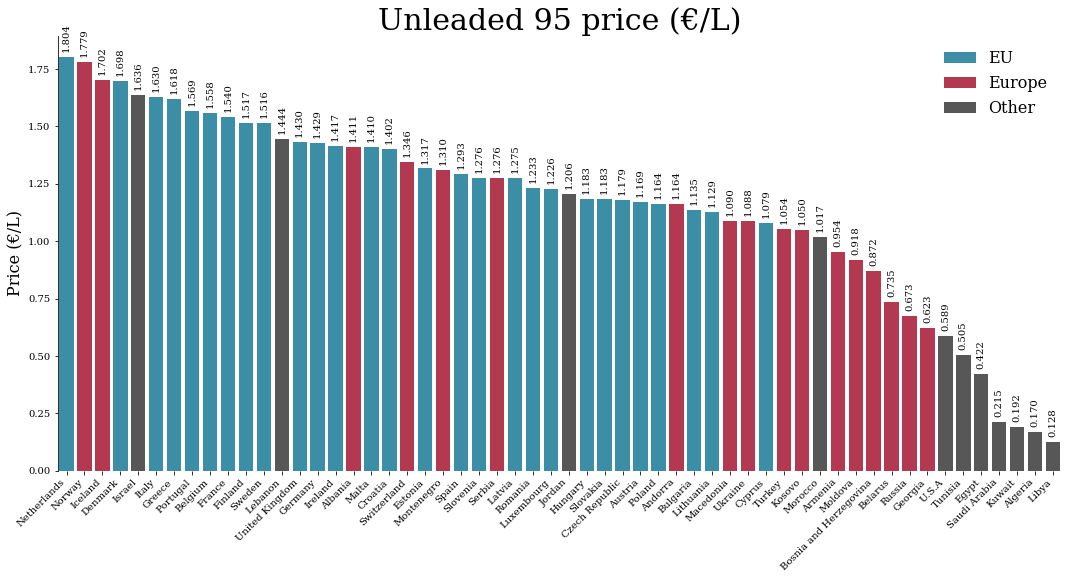

In [7]:
# Sort by Unleaded 95 price
df.sort_values('unleaded_95_eur', ascending=False, inplace=True)

# Color palette
cp = [colors.Colors.evidentia_blue, colors.Colors.evidentia_red, colors.Colors.black]

# Make plot
plot_barchart('unleaded_95_eur', 'Unleaded 95 price (€/L)')

plt.savefig('images/unleaded_95.png', bbox_inches='tight', pad_inches=.2)

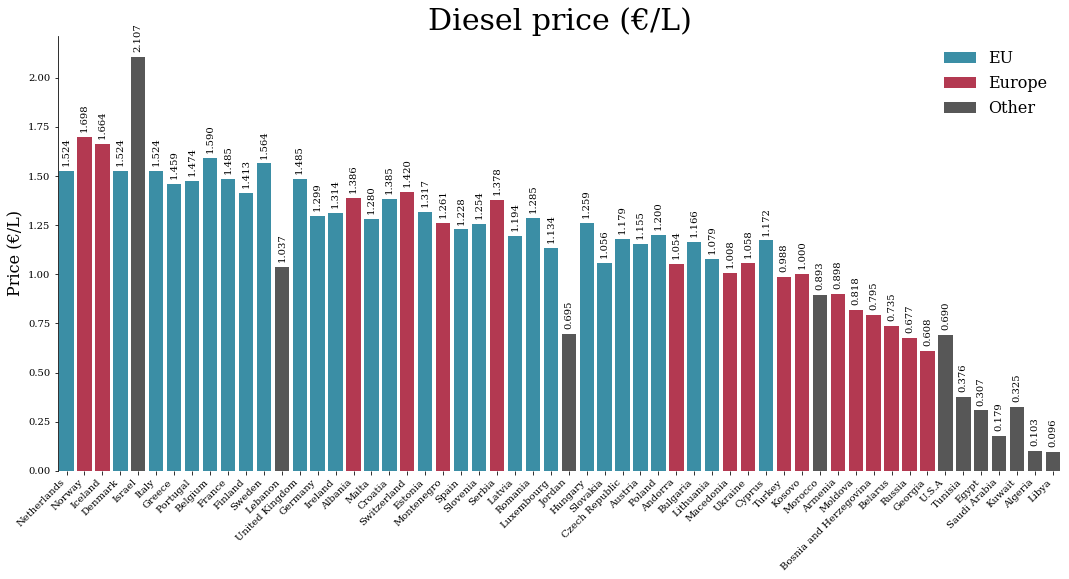

In [8]:
# Make plot
plot_barchart('diesel_eur', 'Diesel price (€/L)')

plt.savefig('images/diesel.png', bbox_inches='tight', pad_inches=.2)

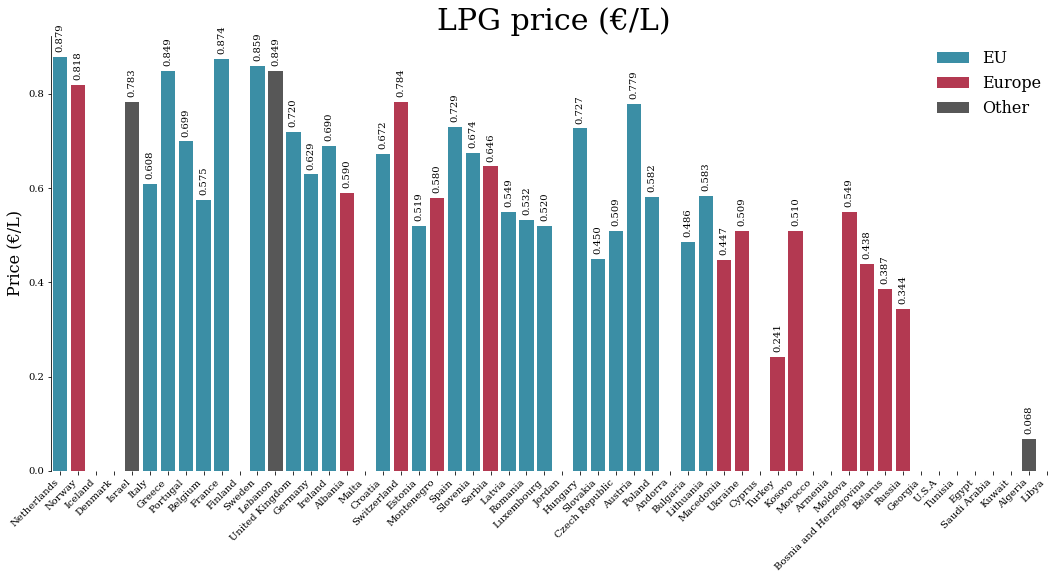

In [9]:
# Make plot
plot_barchart('lpg_eur', 'LPG price (€/L)')

plt.savefig('images/lpg.png', bbox_inches='tight', pad_inches=.2)